<a href="https://colab.research.google.com/github/marciocardoso123/DataScience/blob/main/Modelo_de_Regress%C3%A3o_Linear_Previs%C3%B5es_Quantitativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos módulos

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [20]:
testes = [['TV','radio', 'newspaper'],['radio', 'newspaper'], ['TV','newspaper'],['TV','radio']]
vencedor = {'teste': '', 'performance': None}
primeira_passagem = True
publi = pd.read_csv('/content/Advertising.csv',index_col=0)

In [21]:
publi.shape

(200, 4)

In [22]:
publi.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
#SEPARANDO COLUNAS
x = publi[['TV','Radio','Newspaper']]
y = publi['Sales']

In [24]:
x.shape
#y.shape

(200, 3)

In [25]:
import seaborn as sns

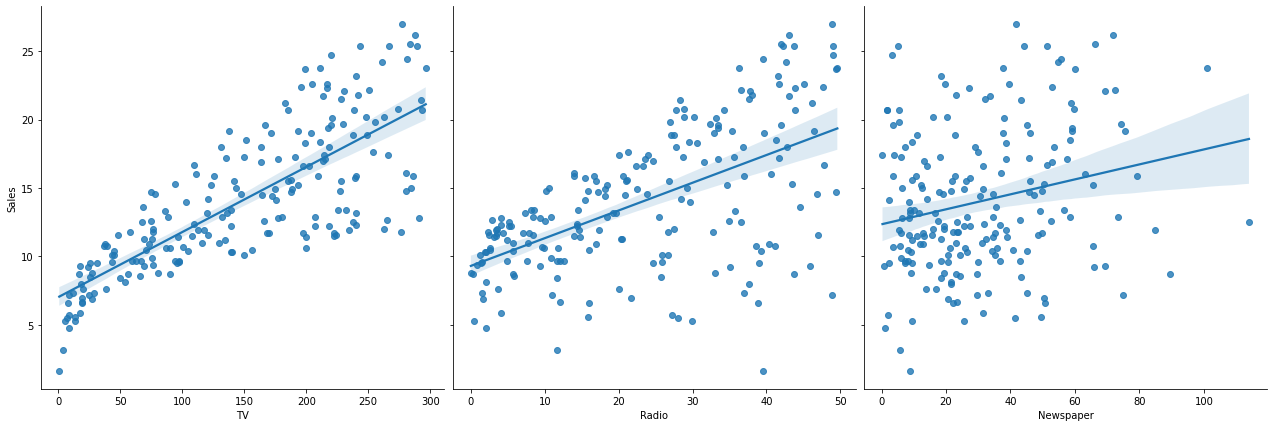

In [26]:
#Gerando graficos para cada variavel independente!
sns.pairplot(publi, x_vars=['TV','Radio','Newspaper'],  y_vars='Sales', size = 6 , kind='reg')

In [27]:
#Podemos definir que qunto maior investimento em propaganda maior será as vendas!

In [28]:
#Vamos dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [29]:
##Importação do modelo linear
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train,y_train)

LinearRegression()

##Coeficiente:
 Proporção de aumento nas vendas para cada 1 un investida em publicidade

In [30]:
list(zip(['TV','Radio','Newspaper'],reglin.coef_))

[('TV', 0.04335917670908946),
 ('Radio', 0.1899904120212213),
 ('Newspaper', -0.007430897050044516)]

###Previsão 


In [ ]:
print(reglin.predict([[230.1,37.8,69.2]]))

In [34]:
y_prev = reglin.predict(x_test)
print(y_prev)

[14.09718146 12.29542179 16.94944296 16.03717792 22.18379974  6.75506352
 18.93277094  9.97888468 22.65627038 18.90591418 11.47396476 20.15146507
 20.90983457  7.88834369 14.97895545 13.43600279  8.69363523 18.8822706
 20.26052681 20.35728429  5.60276049 19.60477084 23.56330779 15.42707935
 15.37189475 12.39230079  6.57063799  9.6625638  11.56569789  9.9076432
 15.18945249 10.63431502 17.50496477 24.33209748 12.34104654  9.17636863
 10.83534473  8.850962   14.62803313 21.10163856  9.36925202 17.90857909
  4.62586027  7.90944905 12.82421601 20.48785312 12.86035211 12.56185644
 12.73994916 10.0310049  19.70330452 18.71157044  9.82651695 20.52162942
 16.46386068 12.19540851 22.38189519 11.18044952 18.10449305 13.71677924]


##Medindo a distancia da previsão com o valores reais

In [36]:
#Avaliando a performance
#MAE (Mean absolute error)
from sklearn import metrics


In [38]:
print(metrics.mean_absolute_error(y_test,y_prev))

1.2719962994902425


##MSE (Mean squared error)

In [39]:
print(metrics.mean_squared_error(y_test,y_prev))

3.299929734136301


##RMSE (Root mean squared error)

In [42]:
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.8165708723130791


In [ ]:
for teste in testes:
    x = publi[teste]
    y = publi['sales']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=5)
    reglin = LinearRegression()
    reglin.fit(x_train,y_train)
    y_prev = reglin.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_prev))
    print('Teste: ')
    print(teste)
    print('Performance: ')
    print(rmse)
    print('-----------------')
    if (primeira_passagem):
        vencedor['teste'] = teste
        vencedor['performance'] = rmse
        primeira_passagem = False
    else:
        if (rmse < vencedor['performance']):
            vencedor['teste'] = teste
            vencedor['performance'] = rmse

print('-----------------') 
print('Vencedor: ')
print(vencedor['teste'])
print('Performance do vencedor: ')
print(vencedor['performance'])